In [ ]:
! pip install -q kaggle

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liux4283","key":"81c48d126da128fa9997b4958be8b7f5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4693  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2692  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            290  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            655  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
! kaggle competitions download -c gan-getting-started

 71% 9.00M/12.7M [00:00<00:00, 15.6MB/s]
100% 12.7M/12.7M [00:00<00:00, 20.1MB/s]
 70% 9.00M/12.9M [00:00<00:00, 12.9MB/s]
100% 12.9M/12.9M [00:00<00:00, 16.6MB/s]
 38% 5.00M/13.1M [00:00<00:01, 6.50MB/s]
100% 13.1M/13.1M [00:00<00:00, 15.0MB/s]
 69% 9.00M/13.0M [00:00<00:00, 11.2MB/s]
100% 13.0M/13.0M [00:00<00:00, 14.1MB/s]
 70% 9.00M/12.9M [00:00<00:00, 12.8MB/s]
100% 12.9M/12.9M [00:00<00:00, 15.6MB/s]
 68% 9.00M/13.2M [00:00<00:00, 16.4MB/s]
100% 13.2M/13.2M [00:00<00:00, 22.4MB/s]
 79% 10.0M/12.6M [00:00<00:00, 13.9MB/s]
100% 12.6M/12.6M [00:00<00:00, 19.9MB/s]
 38% 5.00M/13.0M [00:00<00:00, 11.9MB/s]
100% 13.0M/13.0M [00:00<00:00, 26.6MB/s]
 67% 9.00M/13.4M [00:00<00:00, 17.1MB/s]
100% 13.4M/13.4M [00:00<00:00, 22.8MB/s]
 39% 5.00M/12.9M [00:01<00:02, 3.96MB/s]
100% 12.9M/12.9M [00:01<00:00, 9.51MB/s]
 70% 9.00M/12.8M [00:00<00:00, 16.4MB/s]
100% 12.8M/12.8M [00:00<00:00, 23.8MB/s]
 71% 9.00M/12.7M [00:00<00:00, 17.6MB/s]
100% 12.7M/12.7M [00:00<00:00, 25.8MB/s]
 87% 11.0M/12.6M

In [ ]:
# import data file
import tensorflow as tf
MONET_FILENAMES = tf.io.gfile.glob(str('monet*.tfrec.zip'))
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob(str('photo*.tfrec.zip'))
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))



Monet TFRecord Files: 5
Photo TFRecord Files: 20


In [ ]:
# get the list of files
import zipfile, os

for file in MONET_FILENAMES:   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall() 

for file in PHOTO_FILENAMES:   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall() 

In [ ]:
# read tfrecord file
MONET_FILENAMES = tf.io.gfile.glob(str('monet*.tfrec'))
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob(str('photo*.tfrec'))
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

Monet TFRecord Files: 5
Photo TFRecord Files: 20


In [ ]:
MONET_FILENAMES

['./monet12-60.tfrec',
 './monet04-60.tfrec',
 './monet00-60.tfrec',
 './monet08-60.tfrec',
 './monet16-60.tfrec']

In [ ]:
# define some utility functions for later use
IMAGE_SIZE = [256,256]
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32) / 127.5 - 1.0
    image = tf.reshape(image, [*IMAGE_SIZE,3])
    return image


def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def data_augment(image):
    p_rotate = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_spatial = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    p_crop = tf.random.uniform([], 0, 1.0, dtype=tf.float32)
    
    # Apply jitter
    if p_crop > .5:
        image = tf.image.resize(image, [286, 286])
        image = tf.image.random_crop(image, size=[256, 256, 3])
        if p_crop > .9:
            image = tf.image.resize(image, [300, 300])
            image = tf.image.random_crop(image, size=[256, 256, 3])
    
    # Random rotation
    if p_rotate > .9:
        image = tf.image.rot90(image, k=3) # rotate 270º
    elif p_rotate > .7:
        image = tf.image.rot90(image, k=2) # rotate 180º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k=1) # rotate 90º
    
    # Random mirroring
    if p_spatial > .6:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        if p_spatial > .9:
            image = tf.image.transpose(image)
    
    return image

def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [ ]:
MONET_FILENAMES

['./monet12-60.tfrec',
 './monet04-60.tfrec',
 './monet00-60.tfrec',
 './monet08-60.tfrec',
 './monet16-60.tfrec']

In [ ]:
# load monet and regular images respectively
AUTOTUNE = tf.data.experimental.AUTOTUNE
monet_ds = load_dataset(MONET_FILENAMES, labeled=True).map(data_augment).repeat().shuffle(42).batch(1).prefetch(AUTOTUNE)
photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).map(data_augment).repeat().shuffle(42).batch(1).prefetch(AUTOTUNE)
monet_ds

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>

In [ ]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

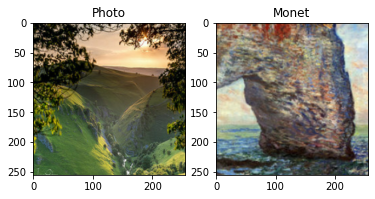

In [ ]:
# print out two example images
import matplotlib.pyplot as plt
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)

In [ ]:
# define downsample function
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(layers.LeakyReLU())

    return result

In [ ]:
# define upsample function
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

# Discriminator

In [ ]:
# define discriminator
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)
    zero_pad1 = layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=inp, outputs=last)

# Some utility functions

In [ ]:
from keras.engine.topology import Layer
import keras.backend as K
from keras.layers import InputSpec
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Input, Dropout
from keras.layers import Conv2DTranspose, Reshape, Activation, Cropping2D, Flatten
from keras.layers import Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal
from keras import backend as k

'''
*****************************************************************************
**************************  ReflectPadding2D   ******************************
*****************************************************************************
'''
class ReflectPadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = padding
        super(ReflectPadding2D, self).__init__(**kwargs)

    def build(self, input_shape):
        super(ReflectPadding2D, self).build(input_shape)

    def call(self, x, mask=None):
        if K.backend() == 'theano':
            T = K.theano.tensor
            p0, p1 = self.padding[0], self.padding[1]
            y = T.zeros((x.shape[0], x.shape[1], x.shape[2]+(2*p0), x.shape[3]+(2*p1)), dtype=K.theano.config.floatX)
            y = T.set_subtensor(y[:, :, p0:-p0, p1:-p1], x)
            y = T.set_subtensor(y[:, :, :p0, p1:-p1], x[:, :, p0:0:-1, :])
            y = T.set_subtensor(y[:, :, -p0:, p1:-p1], x[:, :, -2:-2-p0:-1])
            y = T.set_subtensor(y[:, :, p0:-p0, :p1], x[:, :, :, p1:0:-1])
            y = T.set_subtensor(y[:, :, p0:-p0, -p1:], x[:, :, :, -2:-2-p1:-1])
            y = T.set_subtensor(y[:, :, :p0, :p1], x[:, :, p0:0:-1, p1:0:-1])
            y = T.set_subtensor(y[:, :, -p0:, :p1], x[:, :, -2:-2-p0:-1, p1:0:-1])
            y = T.set_subtensor(y[:, :, :p0, -p1:], x[:, :, p0:0:-1, -2:-2-p1:-1])
            y = T.set_subtensor(y[:, :, -p0:, -p1:], x[:, :, -2:-2-p0:-1, -2:-2-p1:-1])
        else:
            raise NotImplemented("Please complete `CycGAN/layers/padding.py` to run on backend {}.".format(K.backend()))
        return y

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2]+(2*self.padding[0]), input_shape[3]+(2*self.padding[1]))


'''
*****************************************************************************
**************************  InstanceNormalization  **************************
*****************************************************************************
'''
class InstanceNormalization2D(Layer):
    def __init__(self,
                 beta_initializer='zeros',
                 gamma_initializer='ones',
                 epsilon=1e-3,
                 **kwargs):
        super(InstanceNormalization2D, self).__init__(**kwargs)
        if K.image_data_format() is 'channels_first':
            self.axis = 1
        else: # image channels x.shape[3]
            self.axis = 3
        print()
        self.epsilon = epsilon
        self.beta_initializer = beta_initializer
        self.gamma_initializer = gamma_initializer

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(input_shape[self.axis],),
                                     initializer=self.gamma_initializer,
                                     trainable=True,
                                     name='gamma')
        self.beta = self.add_weight(shape=(input_shape[self.axis],),
                                    initializer=self.beta_initializer,
                                    trainable=True,
                                    name='beta')
        super(InstanceNormalization2D, self).build(input_shape)

    def call(self, x):
        # spatial dimensions of input
        if K.image_data_format() is 'channels_first':
            x_w, x_h = (2, 3)
        else:
            x_w, x_h = (1, 2)

        # Very similar to batchnorm, but normalization over individual inputs.

        hw = K.cast(K.shape(x)[x_h]* K.shape(x)[x_w], K.floatx())

        # Instance means
        mu = K.sum(x, axis=x_w)
        mu = K.sum(mu, axis=x_h)
        mu = mu / hw
        mu = K.reshape(mu, (K.shape(mu)[0], K.shape(mu)[1], 1, 1))

        # Instance variences
        sig2 = K.square(x - mu)
        sig2 = K.sum(sig2, axis=x_w)
        sig2 = K.sum(sig2, axis=x_h)
        sig2 = K.reshape(sig2, (K.shape(sig2)[0], K.shape(sig2)[1], 1, 1))

        # Normalize
        y = (x - mu) / K.sqrt(sig2 + self.epsilon)

        # Scale and Shift
        if K.image_data_format() is 'channels_first':
            gamma = K.reshape(self.gamma, (1, K.shape(self.gamma)[0], 1, 1))
            beta = K.reshape(self.beta, (1, K.shape(self.beta)[0], 1, 1))
        else:
            gamma = K.reshape(self.gamma, (1, 1, 1, K.shape(self.gamma)[0]))
            beta = K.reshape(self.beta, (1, 1, 1, K.shape(self.beta)[0]))
        return gamma * y + beta
    
'''
*****************************************************************************
**************************  OTHER util layers   *****************************
*****************************************************************************
'''
conv_init = RandomNormal(0, 0.02) # for convolution kernel
gamma_init = RandomNormal(1., 0.02) # for batch normalization

def conv2d(f, *a, **k):
    return Conv2D(f, kernel_initializer = conv_init, *a, **k)
def batchnorm():
    return BatchNormalization(momentum=0.9, axis=3, epsilon=1.01e-5, 
                              gamma_initializer = gamma_init)

# Generator

In [ ]:
from keras.layers import UpSampling2D
from keras.layers import add
from keras.layers import *


'''
*****************************************************************************
********************************  defineG   *********************************
*****************************************************************************
'''
def Generator(which_model_netG = 'resnet_6blocks', input_shape = (256,256,3), output_shape = (256,256,3), ngf = 150, **kwargs):
    output_nc = output_shape[2]
    if which_model_netG == 'resnet_6blocks':
        return resnet_6blocks(input_shape, output_nc, ngf, **kwargs)
    elif which_model_netG == 'unet_128':
        return unet_128(input_shape, output_nc, ngf, **kwargs)
        

'''
*****************************************************************************
****************************  Generator: Resnet *****************************
*****************************************************************************
'''
padding = ZeroPadding2D # or use ReflectPadding2D

def normalize(**kwargs):
    #return batchnorm()#axis=get_filter_dim()
    return InstanceNormalization2D()


def resnet_block(input, dim, ks =(3,3), strides=(1,1)):
    x = padding((1,1))(input)
    x = Conv2D(dim, ks,strides=strides, kernel_initializer=conv_init)(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    x = padding((1,1))(x)
    x = Conv2D(dim, ks,strides=strides, kernel_initializer=conv_init)(x)
    x = normalize()(x)
    res = add([input, x])
    return res


def resnet_6blocks(input_shape, output_nc, ngf, **kwargs):
    input = Input(input_shape)
    x = padding((3,3))(input)
    x = Conv2D(ngf, (7,7), kernel_initializer=conv_init)(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    n_downsampling = 2
    for i in range(n_downsampling):
        mult = 2**i
        x = Conv2D(ngf * mult * 2, (3,3),
                   padding='same', strides=(2,2),
                   kernel_initializer=conv_init)(x)
        x = normalize()(x)
        x = Activation('relu')(x)


    mult = 2**n_downsampling
    for i in range(6):
        x = resnet_block(x, ngf * mult)

    for i in range(n_downsampling):
        mult = 2**(n_downsampling - i)
        f = int(ngf * mult / 2)
        x = Conv2DTranspose(f, (3,3), strides=(2,2),
                            padding='same', kernel_initializer=conv_init)(x)
        x = normalize()(x)
        x = Activation('relu')(x)

    x = padding((3,3))(x)
    x = Conv2D(output_nc, (7,7), kernel_initializer = conv_init)(x)
    x = Activation('tanh')(x)


    model = Model(inputs=input, outputs=[x])
    print('Model resnet 6blocks:')
    model.summary()
    return model

def unet_128(input_shape, output_nc, ngf=128, fixed_input_size=True, **kwargs):    
    isize = input_shape[0]
    nc_in = input_shape[2]
    nc_out = output_nc
    max_nf = 8*ngf    
    def block(x, s, nf_in, use_batchnorm=True, nf_out=None, nf_next=None):
        # print("block",x,s,nf_in, use_batchnorm, nf_out, nf_next)
        assert s>=2 and s%2==0
        if nf_next is None:
            nf_next = min(nf_in*2, max_nf)
        if nf_out is None:
            nf_out = nf_in
        x = conv2d(nf_next, kernel_size=4, strides=2, use_bias=(not (use_batchnorm and s>2)),
                   padding="same", name = 'conv_{0}'.format(s)) (x)
        if s>2:
            if use_batchnorm:
                x = batchnorm()(x, training=1)
            x2 = LeakyReLU(alpha=0.2)(x)
            x2 = block(x2, s//2, nf_next)
            x = Concatenate(axis=3)([x, x2])            
        x = Activation("relu")(x)
        x = Conv2DTranspose(nf_out, kernel_size=4, strides=2, use_bias=not use_batchnorm,
                            kernel_initializer = conv_init,          
                            name = 'convt.{0}'.format(s))(x)        
        x = Cropping2D(1)(x)
        if use_batchnorm:
            x = batchnorm()(x, training=1)
        return x
    
    s = isize if fixed_input_size else None
    m = inputs = Input(shape=(s, s, nc_in))        
    m = block(m, isize, nc_in, False, nf_out=nc_out, nf_next=ngf)
    m = Activation('tanh')(m)
    
    # Model
    model = Model(inputs=inputs, outputs=[m])
    print('Generator Unet 128:')
    model.summary()
    return model

# Model Configuration

In [ ]:
# assign generator and discriminator
! pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
monet_generator = Generator() # transforms photos to Monet-esque paintings
photo_generator = Generator() # transforms Monet paintings to be more like photos

monet_discriminator = Discriminator() # differentiates real Monet paintings and generated Monet paintings
photo_discriminator = Discriminator() # differentiates real photos and generated photos



















Model resnet 6blocks:
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_92 (ZeroPadding2 (None, 262, 262, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_126 (Conv2D)             (None, 256, 256, 150 22200       zero_padding2d_92[0][0]          
__________________________________________________________________________________________________
instance_normalization2d_102 (I (None, 256, 256, 150 300         conv2d_126[0][0]                 
____________________________________________________

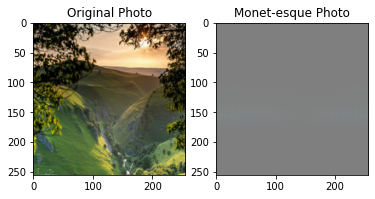

In [ ]:
to_monet = monet_generator(example_photo)
plt.subplot(1, 2, 1)
plt.title("Original Photo")
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-esque Photo")
plt.imshow(to_monet[0] * 0.5 + 0.5)
plt.show()


In [ ]:
# define cyclegan class
class CycleGan(keras.Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
    
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)
     # discriminator used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)
             # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                                  self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)
        
        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                                      self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                 self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))
        
        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                  self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))
        
        return {
            "monet_gen_loss": total_monet_gen_loss,
            "photo_gen_loss": total_photo_gen_loss,
            "monet_disc_loss": monet_disc_loss,
            "photo_disc_loss": photo_disc_loss
        }
        



In [ ]:
# define discriminator loss
def discriminator_loss(real, generated):
      real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

      generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

      total_disc_loss = real_loss + generated_loss

      return total_disc_loss * 0.5

In [ ]:
 # define generator loss
 def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

In [ ]:
# define cycle loss
def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

        return LAMBDA * loss1

In [ ]:
 # define identity loss
 def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

In [ ]:
# define optimizer
monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
# configure the model
cycle_gan_model = CycleGan(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = calc_cycle_loss,
        identity_loss_fn = identity_loss
    )


In [ ]:
# define a learning rate scheduler
import tensorflow.keras.backend as K

class LR_sceduler(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        if epoch < 100:
            pass
        else:
            lr_monet_G = monet_generator_optimizer.learning_rate.numpy()
            K.set_value(monet_generator_optimizer.learning_rate, lr_monet_G * tf.math.exp(-0.1))

            lr_monet_D = monet_discriminator_optimizer.learning_rate.numpy()
            K.set_value(monet_discriminator_optimizer.learning_rate, lr_monet_D * tf.math.exp(-0.1))
            lr_photo_G = photo_generator_optimizer.learning_rate.numpy()
            K.set_value(photo_generator_optimizer.learning_rate, lr_photo_G * tf.math.exp(-0.1))

            lr_photo_D = photo_discriminator_optimizer.learning_rate.numpy()
            K.set_value(photo_discriminator_optimizer.learning_rate, lr_photo_D * tf.math.exp(-0.1))
lr_callback = LR_sceduler()

# Model Fitting

In [ ]:
# model fitting
with tf.device('/device:GPU:0'):
  cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=10,
steps_per_epoch = 7350,callbacks=[lr_callback]
  )

In [ ]:
# show examples of before and after monet style transfer
import numpy as np
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

In [ ]:
# make download directory
import PIL
import numpy as np
! mkdir ../images

mkdir: cannot create directory ‘../images’: File exists


# Output Prediction Result

In [ ]:
photo_ds_test = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1).cache().prefetch(AUTOTUNE)

i = 0
for img in photo_ds_test:
    predictions = monet_generator(img, training=False)
    for j in range(7028):
        prediction = predictions[j].numpy()
        prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
        im = PIL.Image.fromarray(prediction)
        original_img = PIL.Image.fromarray((img[j].numpy()* 127.5 + 127.5).astype(np.uint8))
        original_img.save("/content/drive/MyDrive/Deep Learning Project/dataset/original_" + str(i) + ".jpg")
        im.save("/content/drive/MyDrive/Deep Learning Project/dataset" + str(i) + ".jpg")
        i = i+1

In [ ]:
photo_ds_test = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1).cache().prefetch(AUTOTUNE)
i = 1
for img in photo_ds_test:
    prediction = monet_generator(img, training=False).numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    for pred in prediction:
        im = PIL.Image.fromarray(pred)
        im.save("../images/" + str(i) + ".jpg")
        i += 1

In [ ]:
photo_ds_test

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>

In [ ]:
import shutil
shutil.make_archive("/images", 'zip','/images')

'/images.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.download('/images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>